In [75]:
# Import Dependencies
from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.seasonal import MSTL

In [4]:
# Defining file paths/reading data with pandas library

hourly_file_path = Path("Resources/saleshourly.csv")
hourly_df = pd.read_csv(hourly_file_path, encoding="ISO-8859-1")

daily_file_path = Path("Resources/salesdaily.csv")
daily_df = pd.read_csv(daily_file_path, encoding="ISO-8859-1")

weekly_file_path = Path("Resources/salesweekly.csv")
weekly_df = pd.read_csv(weekly_file_path, encoding="ISO-8859-1")

monthly_file_path = Path("Resources/salesmonthly.csv")
monthly_df = pd.read_csv(monthly_file_path, encoding="ISO-8859-1")

In [90]:
hourly_df["Total_Sales"] = hourly_df['M01AB'] + hourly_df['M01AE'] + hourly_df['N02BA'] + hourly_df['N02BE'] + hourly_df['N05B'] + hourly_df['N05C'] + hourly_df['R03'] + hourly_df['R06']
hourly_df["Total_Sales"] = hourly_df["Total_Sales"].astype("float")
hdf1 = hourly_df.loc[hourly_df['Year'] == 2014]
hdf = hdf1.drop(columns=['M01AB', 'M01AE', 'N02BA', 'N02BE', 'N05B', 'N05C', 'R03', 'R06', 'Month', 'Weekday Name', 'Year', 'Hour'])
# hdf = hdf[hdf.Total_Sales != 0]
hdf['datum'] = pd.to_datetime(hdf['datum'])
hourly_2014_df = hdf.set_index('datum')
hts_2014 = hourly_2014_df['Total_Sales']


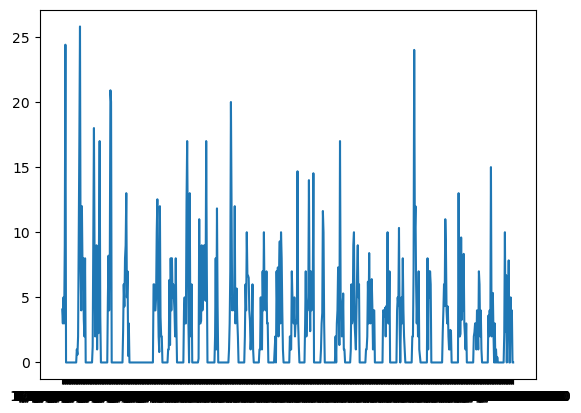

In [92]:
jan = hdf1.loc[hdf1['Month'] == 1]
feb = hdf1.loc[hdf1['Month'] == 2]
march = hdf1.loc[hdf1['Month'] == 3]
april = hdf1.loc[hdf1['Month'] == 4]
may = hdf1.loc[hdf1['Month'] == 5]
june = hdf1.loc[hdf1['Month'] == 6]
july = hdf1.loc[hdf1['Month'] == 7]
aug = hdf1.loc[hdf1['Month'] == 8]
sept = hdf1.loc[hdf1['Month'] == 9]
oct = hdf1.loc[hdf1['Month'] == 10]
nov = hdf1.loc[hdf1['Month'] == 11]
dec = hdf1.loc[hdf1['Month'] == 12]

plt.plot(jan["datum"], jan["Total_Sales"])
plt.show()

In [76]:
stl_kwargs = {"seasonal_deg": 0} 
model = MSTL(hts_2014, periods=(24, 24 * 7), stl_kwargs=stl_kwargs)
res = model.fit()

In [77]:
seasonal = res.seasonal # contains both seasonal components
trend = res.trend
residual = res.resid

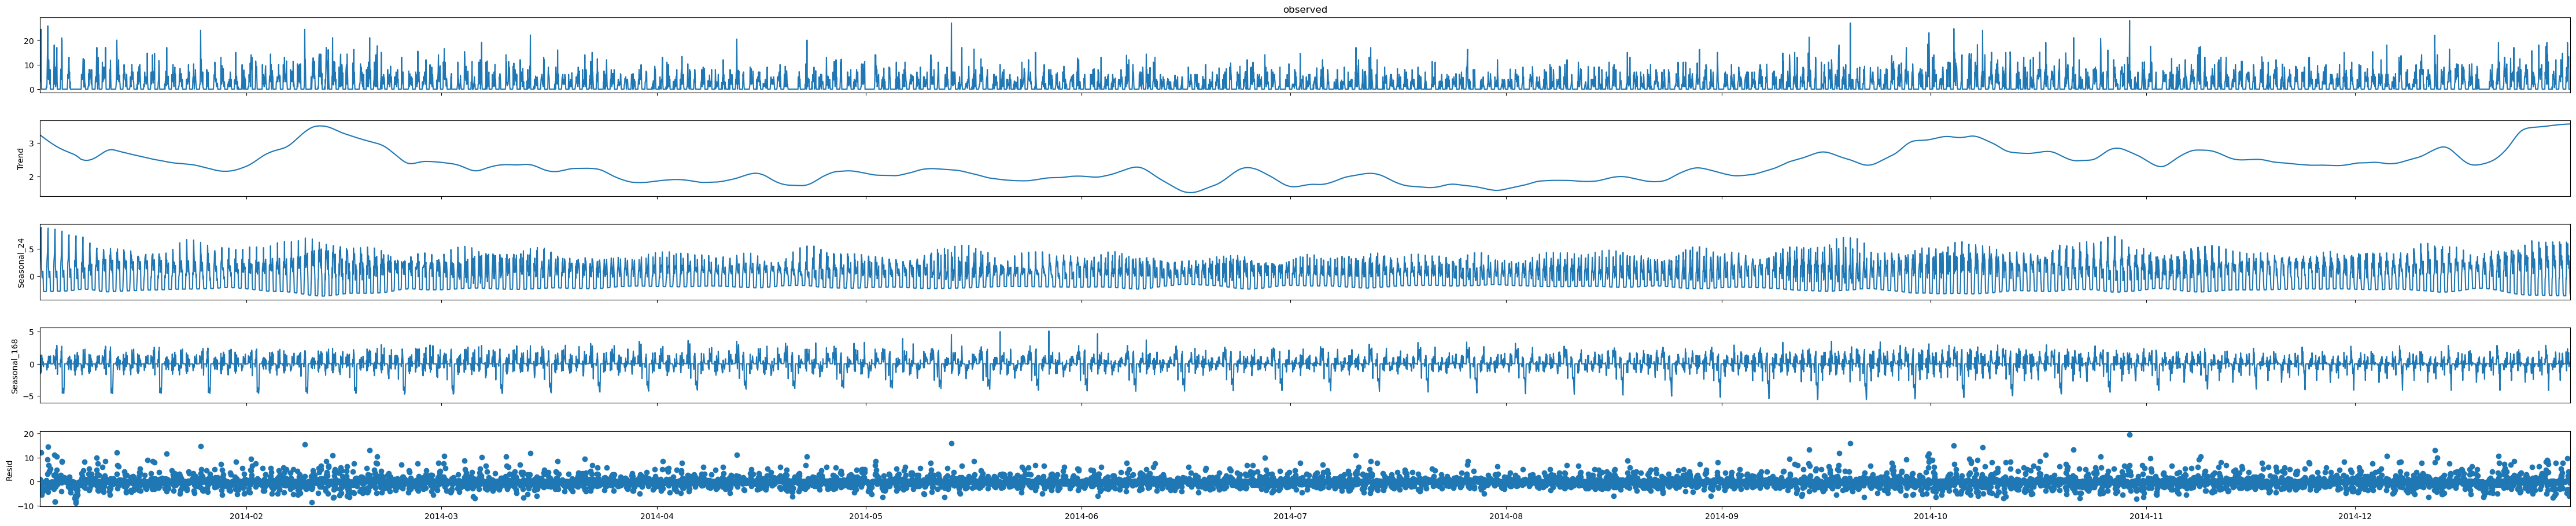

In [85]:
fig = res.plot()  # Store the plot in a variable

# Set the figure size
fig.set_size_inches(50, 10)  # Set the width and height

# Show the plot
plt.show()

In [9]:
df14 = hourly_df.loc[hourly_df['Year'] == 2014]
hourly_2014_df = df14.drop(columns=['M01AB', 'M01AE', 'N02BA', 'N02BE', 'N05B', 'N05C', 'R03', 'R06', 'Month', 'Weekday Name', 'Year', 'Hour'])
hourly_2014_df

,datum,Total_Sales
0,1/2/2014 8:00,4.07
1,1/2/2014 9:00,3.00
2,1/2/2014 10:00,5.00
3,1/2/2014 11:00,3.00
4,1/2/2014 12:00,9.00
...,...,...
8723,12/31/2014 19:00,0.00
8724,12/31/2014 20:00,0.00
8725,12/31/2014 21:00,0.00
8726,12/31/2014 22:00,0.00


In [99]:
daily_df["Total_Sales"] = daily_df['M01AB'] + daily_df['M01AE'] + daily_df['N02BA'] + daily_df['N02BE'] + daily_df['N05B'] + daily_df['N05C'] + daily_df['R03'] + daily_df['R06']
daily_df["Total_Sales"] = daily_df["Total_Sales"].astype("float")
dff = daily_df[daily_df.Total_Sales != 0]
df1 = dff.loc[dff['Year'] == 2014]
df = df1.drop(columns=['M01AB', 'M01AE', 'N02BA', 'N02BE', 'N05B', 'N05C', 'R03', 'R06', 'Month', 'Weekday Name', 'Year', 'Hour'])
df['datum'] = pd.to_datetime(df['datum'])
daily_2014_df = df.set_index('datum')
ts_2014 = daily_2014_df['Total_Sales']
ts_2014

datum
2014-01-02     48.47
2014-01-03    107.00
2014-01-04     91.35
2014-01-05     66.10
2014-01-06     58.20
               ...  
2014-12-27     94.07
2014-12-28    125.50
2014-12-29     57.99
2014-12-30     94.43
2014-12-31     83.58
Name: Total_Sales, Length: 360, dtype: float64

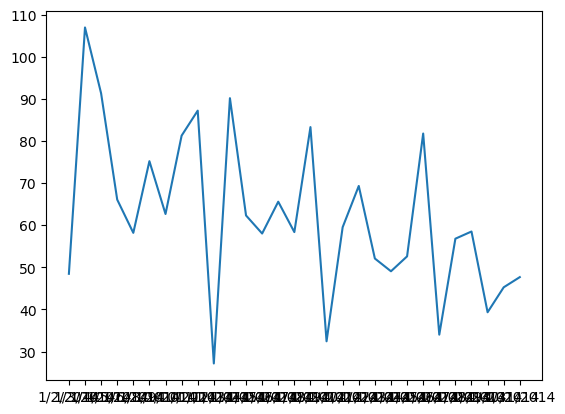

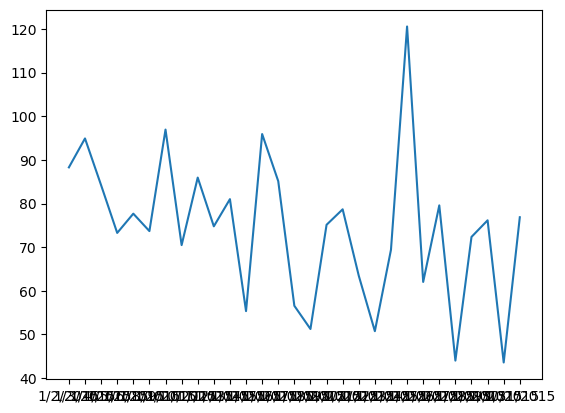

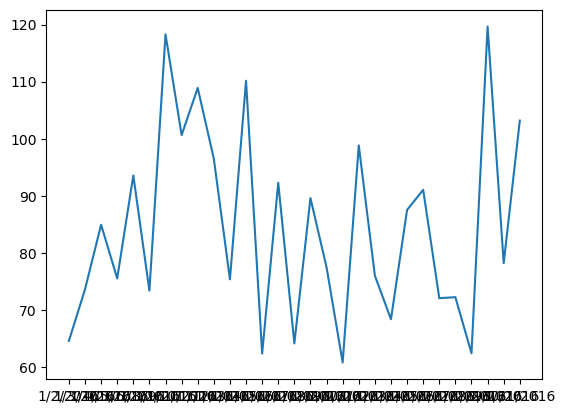

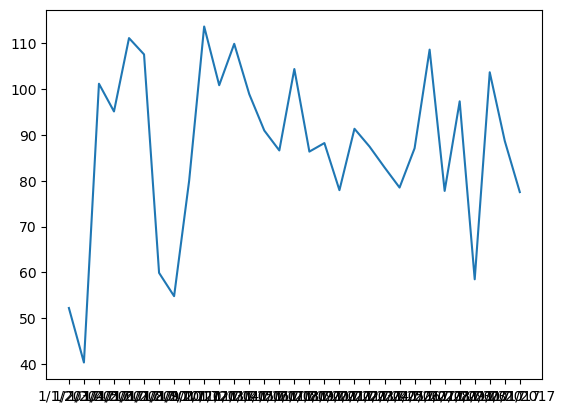

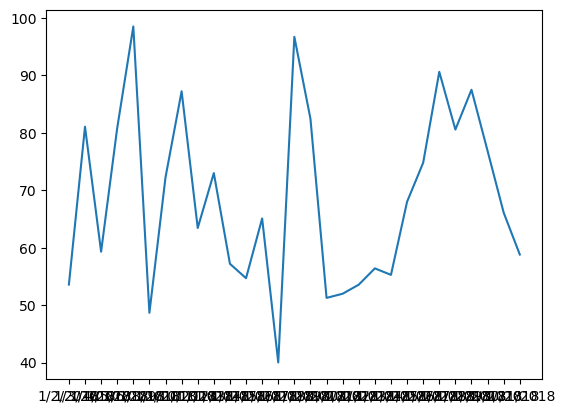

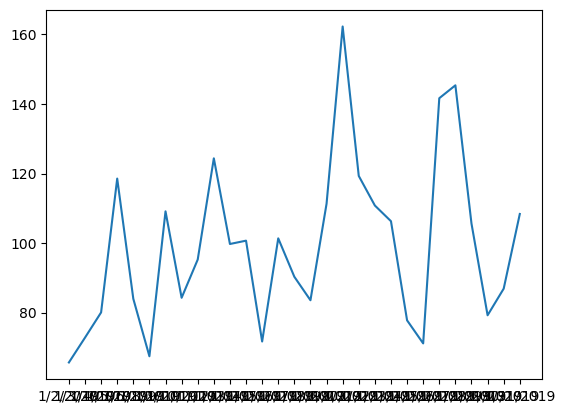

In [100]:
jan = df1.loc[df1['Month'] == 1]
feb = df1.loc[df1['Month'] == 2]
march = df1.loc[df1['Month'] == 3]
april = df1.loc[df1['Month'] == 4]
may = df1.loc[df1['Month'] == 5]
june = df1.loc[df1['Month'] == 6]
july = df1.loc[df1['Month'] == 7]
aug = df1.loc[df1['Month'] == 8]
sept = df1.loc[df1['Month'] == 9]
oct = df1.loc[df1['Month'] == 10]
nov = df1.loc[df1['Month'] == 11]
dec = df1.loc[df1['Month'] == 12]

df2 = dff.loc[dff['Year'] == 2015]
df3 = dff.loc[dff['Year'] == 2016]
df4 = dff.loc[dff['Year'] == 2017]
df5 = dff.loc[dff['Year'] == 2018]
df6 = dff.loc[dff['Year'] == 2019]

jan2 = df2.loc[df2['Month'] == 1]
feb2 = df2.loc[df2['Month'] == 2]
march2 = df2.loc[df2['Month'] == 3]
april2= df2.loc[df2['Month'] == 4]
may2 = df2.loc[df2['Month'] == 5]
# june2 = df1.loc[df1['Month'] == 6]
# july2 = df1.loc[df1['Month'] == 7]
# aug2 = df1.loc[df1['Month'] == 8]
# sept2 = df1.loc[df1['Month'] == 9]
# oct22 = df1.loc[df1['Month'] == 10]
# nov2 = df1.loc[df1['Month'] == 11]
# dec = df1.loc[df1['Month'] == 12]

jan3 = df3.loc[df3['Month'] == 1]
jan4 = df4.loc[df4['Month'] == 1]
jan5 = df5.loc[df5['Month'] == 1]
jan6 = df6.loc[df6['Month'] == 1]


plt.plot(jan["datum"], jan["Total_Sales"])
plt.show()
# plt.plot(feb["datum"], feb["Total_Sales"])
# plt.show()
# plt.plot(march["datum"], march["Total_Sales"])
# plt.show()
# plt.plot(may["datum"], may["Total_Sales"])
# plt.show()
# plt.plot(june["datum"], june["Total_Sales"])
# plt.show()
# plt.plot(july["datum"], july["Total_Sales"])
# plt.show()

plt.plot(jan2["datum"], jan2["Total_Sales"])
plt.show()
plt.plot(jan3["datum"], jan3["Total_Sales"])
plt.show()
plt.plot(jan4["datum"], jan4["Total_Sales"])
plt.show()
plt.plot(jan5["datum"], jan5["Total_Sales"])
plt.show()
plt.plot(jan6["datum"], jan6["Total_Sales"])
plt.show()

In [ ]:
fig, ax = plt.subplots(figsize=(12, 8))

for year in pivot_df.columns:
    ax.plot(pivot_df.index, pivot_df[year], marker='o', label=str(year))

ax.set_xlabel('Hour')
ax.set_ylabel('Quantity Sold')
ax.set_title('Hourly Pharmaceutical Sales from Year to Year (Line)')
ax.legend(title='Year')

plt.xlim(6,23)
plt.tight_layout()
plt.show()

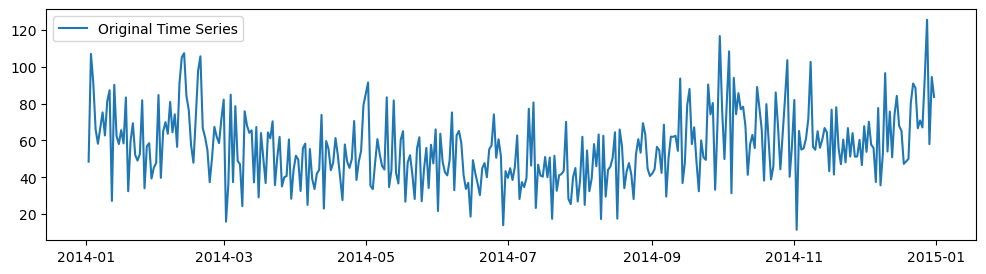

In [71]:
plt.figure(figsize=(12, 3))
plt.plot(ts_2014, label='Original Time Series')
plt.legend()

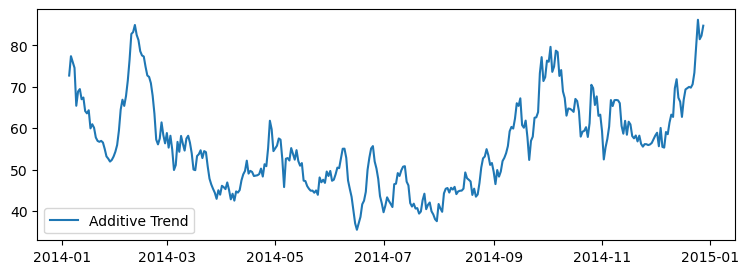

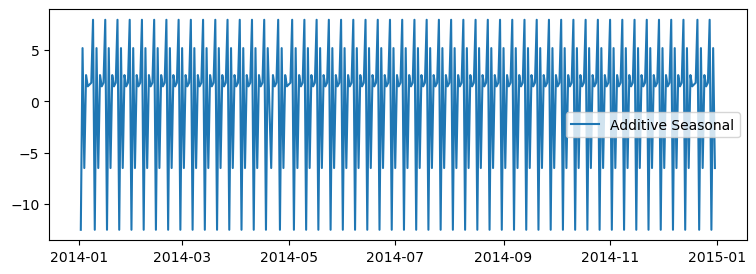

In [72]:
result_add = seasonal_decompose(ts_2014, model='additive', filt=None, period=7, two_sided=True, extrapolate_trend=0)

plt.figure(figsize=(9, 3))
plt.plot(result_add.trend, label='Additive Trend')
plt.legend()

   
plt.figure(figsize=(9, 3))
plt.plot(result_add.seasonal, label='Additive Seasonal')
plt.legend()

In [59]:
sma_window = 7  # 7-day moving average
sma = ts_2014.rolling(window=sma_window).mean()

ema_window = 30  # 30-day moving average
ema = ts_2014.ewm(span=ema_window, adjust=False).mean()

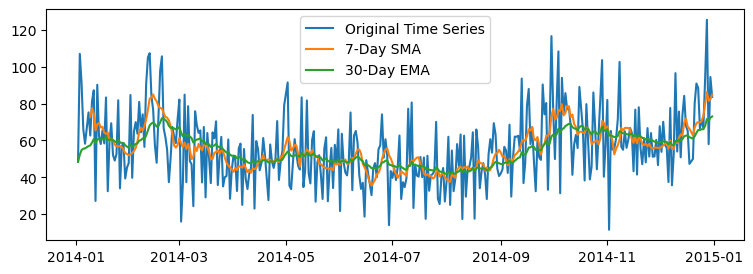

In [60]:
plt.figure(figsize=(9, 3))
plt.plot(ts_2014, label='Original Time Series')
plt.plot(sma, label=f'{sma_window}-Day SMA')
plt.plot(ema, label=f'{ema_window}-Day EMA')
plt.legend()

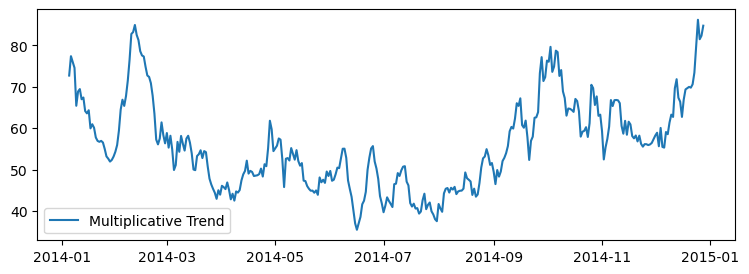

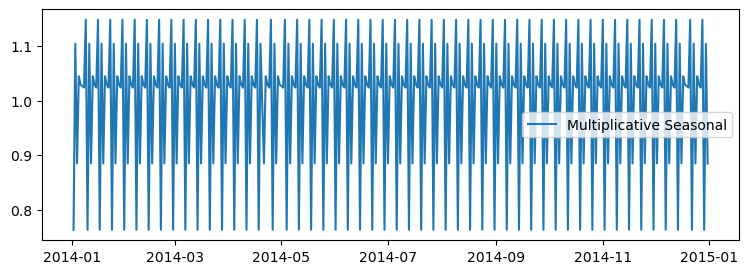

In [64]:
result_mult = seasonal_decompose(ts_2014, model='multiplicative', filt=None, period=7, two_sided=True, extrapolate_trend=0)

plt.figure(figsize=(9, 3))
plt.plot(result_mult.trend, label='Multiplicative Trend')
plt.legend()

   
plt.figure(figsize=(9, 3))
plt.plot(result_mult.seasonal, label='Multiplicative Seasonal')
plt.legend()

In [65]:
sma_window = 7  # 7-day moving average
sma = ts_2014.rolling(window=sma_window).mean()

ema_window = 30  # 30-day moving average
ema = ts_2014.ewm(span=ema_window, adjust=False).mean()

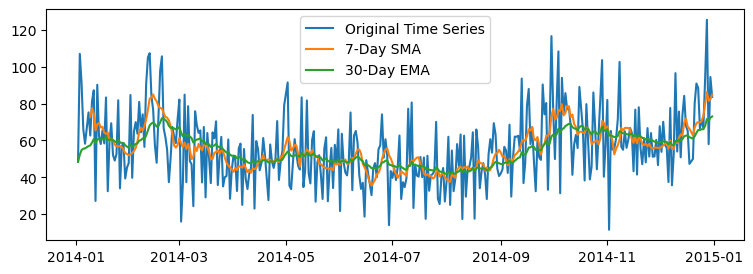

In [66]:
plt.figure(figsize=(9, 3))
plt.plot(ts_2014, label='Original Time Series')
plt.plot(sma, label=f'{sma_window}-Day SMA')
plt.plot(ema, label=f'{ema_window}-Day EMA')
plt.legend()

In [ ]:
log_series = np.log(daily_2014_df['Total_Sales'])

# Plot the log-transformed series
plt.figure(figsize=(14, 5))
plt.plot(log_series)
plt.title("Log-transformed Total Sales")
plt.show()